### Nikhil Jamdade 
K means clustering - unsupervised learning method is used while approaching this problem 

Approach 1 - Taking 11 clusters and segmenting lion object 

Approach 2 - First iteration 5 clusters are used and output is then fed to next iteration with 4 clusters. This is boosting approach and output can be improved with increase in number of steps/iterations

Please install skimage,numpy,cv2,matplotlib,scipy,sklearn before running this program. 

In [98]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from sklearn.cluster import KMeans

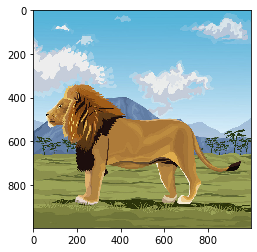

In [25]:
image =plt.imread('lion.jpg')
plt.imshow(image)
picture_n= image.reshape(image.shape[0]*image.shape[1], image.shape[2])

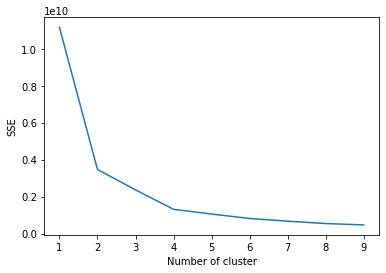

In [5]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,random_state=0).fit(picture_n)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Above plots shows that Elbow criteria : Optimal number of clusters for this image is K=4 

# Approach 1: Clusters K =11 

In [53]:
class Segment_Class:
    def __init__(self,clusters=4):
        #number of clusters default is 4
        self.clusters=clusters
   
    def kmeans(self,image):
        picture = cv2.GaussianBlur(image,(3,3),0)      # filter size 
        picture=picture.astype(int)
        picture_n = picture.reshape(picture.shape[0]*picture.shape[1], picture.shape[2])
        
        kmeans = KMeans(n_clusters=self.clusters, random_state=0).fit(picture_n)
        labels = kmeans.predict(picture_n)
        seg_pic = kmeans.cluster_centers_[kmeans.labels_]
        cluster_pic = seg_pic.reshape(picture.shape[0], picture.shape[1], picture.shape[2])
        cluster_pic= cluster_pic.astype(int)
        labels_pic = labels.reshape(picture.shape[0], picture.shape[1])
        
        return (cluster_pic,labels_pic)

    def object_exctraction(self,image,label_pic,label):
        output_pic=np.zeros(image.shape,np.uint8)
        
        output_pic[label_pic==label]=image[label_pic==label]
        
        return output_pic

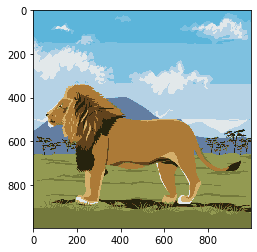

In [54]:
s=Segment_Class(11)        # number of clusters K 
seg_img,label_img = s.kmeans(image)
plt.imshow(seg_img)

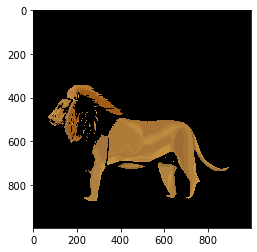

In [61]:
output_i=s.object_exctraction(image,label_img,label=7)   # change the object label here 
plt.imshow(output_i)

# Approach 2 : Clusters K1 = 5 and K2 = 4

## labels = {lion, ground, sky, mountian and trees} 


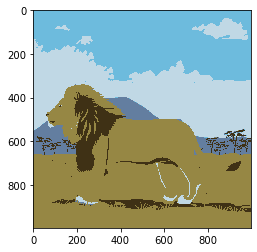

In [92]:
s2=Segment_Class(5)        # number of clusters K = 5
seg_img2,label_img2 = s2.kmeans(image)
plt.imshow(seg_img2)

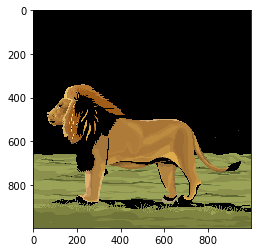

In [93]:
output_img2=s2.object_exctraction(image,label_img2,label=0)   # change the object label here 
plt.imshow(output_img2)

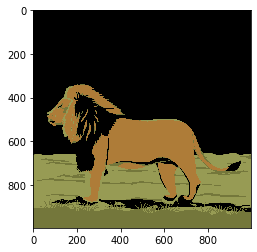

In [94]:
s3=Segment_Class(4)        # number of clusters K 
seg_img3,label_img3 = s3.kmeans(output_img2)       # feeding previous output image i.e output image 2 
plt.imshow(seg_img3)

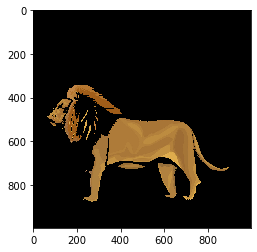

In [106]:
output_img3=s3.object_exctraction(image,label_img3,label=3)   # change the object label here 
plt.imshow(output_img3)
